## Intro

Using the normal distribution to model our data. 
Compute z-scores to find any outliers.

## Overview

In this notebook, I will continue with the previous scenario in which you’re a data professional working for the Department of Education of a large nation. Recall that we are analyzing data on the literacy rate for each district, and we have already computed descriptive statistics to summarize your data. For the next part of our analysis, we want to find out if the data on district literacy rate fits a specific type of probability distribution. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

import statsmodels.api as sm

import eda_functions as eda



In [2]:
path = '/home/gato/Scripts/DS/Statistics/data/education_districtwise.csv'
df   = pd.read_csv(path)

## standarize column names
df.columns = df.columns.str.strip().str.lower()

In [3]:
df.head()

,distname,statname,blocks,villages,clusters,totpopulat,overall_li
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distname    680 non-null    object 
 1   statname    680 non-null    object 
 2   blocks      680 non-null    int64  
 3   villages    680 non-null    int64  
 4   clusters    680 non-null    int64  
 5   totpopulat  634 non-null    float64
 6   overall_li  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 37.3+ KB


In [5]:
eda.miss_df(df)

,Total,Percent
totpopulat,46,6.764706
overall_li,46,6.764706
distname,0,0.000000
statname,0,0.000000
blocks,0,0.000000
villages,0,0.000000
clusters,0,0.000000


In [6]:
df.dtypes

distname       object
statname       object
blocks          int64
villages        int64
clusters        int64
totpopulat    float64
overall_li    float64
dtype: object

In [7]:
eda.invalid_df(df)

,columns,nulls,invalids,unique_item
0,distname,0,0,"[DISTRICT32, DISTRICT649, DISTRICT229, DISTRIC..."
1,statname,0,0,"[STATE1, STATE16, STATE26, STATE36, STATE15, S..."
2,blocks,0,0,"[13, 18, 8, 12, 6, 7, 10, 11, 15, 14, 4, 5, 19..."
3,villages,0,0,"[391, 678, 94, 523, 359, 110, 134, 388, 361, 1..."
4,clusters,0,0,"[104, 144, 65, 64, 96, 49, 54, 80, 86, 95, 120..."
5,totpopulat,46,0,"[875564.0, 1015503.0, 1269751.0, 735753.0, 570..."
6,overall_li,46,0,"[66.92, 66.93, 71.21, 57.98, 65.0, 64.32, 80.4..."


In [8]:
## the missing information part.
df[df['totpopulat'].isnull() == True ]

,distname,statname,blocks,villages,clusters,totpopulat,overall_li
54,DISTRICT302,STATE26,5,510,61,NaN,NaN
55,DISTRICT276,STATE26,6,393,59,NaN,NaN
200,DISTRICT588,STATE21,10,951,71,NaN,NaN
205,DISTRICT535,STATE21,13,1050,99,NaN,NaN
206,DISTRICT218,STATE21,8,341,47,NaN,NaN
207,DISTRICT258,STATE21,6,342,53,NaN,NaN
266,DISTRICT303,STATE3,4,62,5,NaN,NaN
267,DISTRICT608,STATE3,3,160,13,NaN,NaN
268,DISTRICT62,STATE3,4,145,7,NaN,NaN
269,DISTRICT474,STATE3,4,91,11,NaN,NaN


In [9]:
df = df.dropna()

In [10]:
## Is better to drop as they are not a considerable amount.
## dropping the 46 missing information exemples
eda.miss_df(df)

,Total,Percent
distname,0,0.0
statname,0,0.0
blocks,0,0.0
villages,0,0.0
clusters,0,0.0
totpopulat,0,0.0
overall_li,0,0.0


## Descriptive Statistics

Lets recall that we are observing the district literacy.

Observing the probability distribution with an **histogram**.
Also statistics descriptivas.
here we can have some inferences related to the distibution.

In [11]:
df['overall_li'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: overall_li, dtype: float64

DescribeResult(nobs=634, minmax=(42.790531694595686, 103.3183379606059), mean=73.83119328714177, variance=104.9919287363948, skewness=0.09276329513503141, kurtosis=0.024117853847971382)


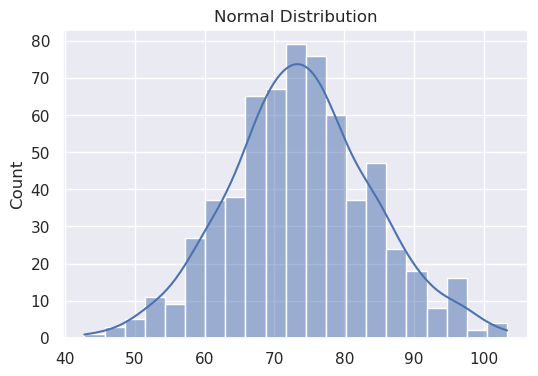

In [12]:
## Normal dist with similar mu and std that the real data, but fake.
mu = 73.39
sigma = 10.09
rand1 = np.random.normal(mu, sigma, 634)
plt.figure(figsize = (6, 4))
ax = plt.subplot()
sns.histplot(data=rand1,kde=True, hue=None)
ax.set_title('Normal Distribution');
print(stats.describe(rand1))

Text(0.5, 1.0, 'Literacy')

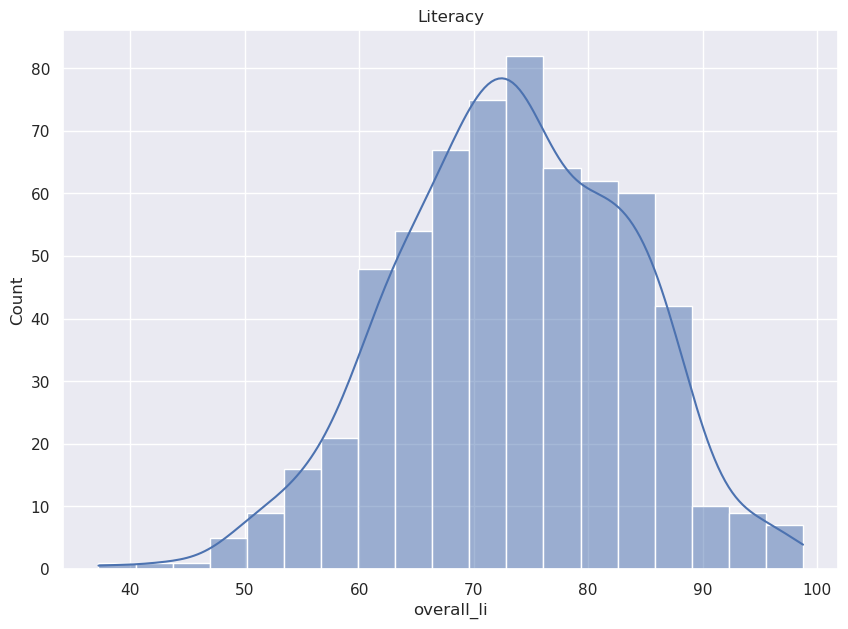

In [13]:
## with the real data
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.histplot(data=df['overall_li'], kde=True, hue=None)
ax.set_title('Literacy')

In [14]:
eda.estadisticas(df, 'overall_li')

,overall_li
observations,634.000000
minimun,37.220000
maximun,98.760000
mean,73.395189
variance,101.978903
skewness,-0.157327
kurtosis,-0.117509


### Normal distribution


The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which is around 73%, is located in the center of the plot. Recall that the **normal distribution** is a continuous probability distribution that is bell-shaped and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modeling option for the data. 

# Empirical rule
---

Since the normal distribution seems like a good fit for the district literacy rate data, we can expect the empirical rule to apply relatively well. Recall that the **empirical rule** says that for a normal distribution:

*   **68%** of the values fall within +/- 1 SD from the mean
*   **95%** of the values fall within +/- 2 SD from the mean
*   **99.7%** of the values fall within +/- 3 SD from the mean

**"SD" : standard deviation.**

 In other words, we can expect that about:

*   **68%** of district literacy rates will fall within +/- 1 SD from the mean.
*   **95%** of district literacy rates will fall within +/- 2 SD from the mean.
*   **99.7%** of district literacy rates will fall within +/- 3 SD from the mean.

In [15]:
## First we obtain the mean and SD
mean =  df['overall_li'].mean()
SD   = df['overall_li'].std()

In [16]:
print(f'THE SD IS: {SD}%')
print(f'THE MEAN IS: {mean}')

THE SD IS: 10.098460413782469%
THE MEAN IS: 73.39518927444797


## Calculating the % of district literacy rates that fall with in +/- 1 SD from the mean

 1) Two new variables, `lowerLim` and `uppLim`, also using the previously obtain `mean` and `SD`.
     
     `lowerLim` = `mean` - (1 * `SD`)
     `upperLim` = `mean` + (1 * `SD`)
     
 2) Observe the percentage of values between the limits. This way we can compare the expected values from the **Empirical Rule**
     

In [17]:
## to obtain the percentages, we will add a new line of code that tells the computer 
## to decide if each value in the `OVERALL_LI` column is between the lower limit and 
## upper limit. To do this, we will use the relational operators greater than or 
## equal to (`>=`) and less than or equal to (`<=`), and the bitwise operator AND 
## (`&`). Finally, we will use `mean()` to divide the number of values that are within 
## 1 SD of the mean by the total number of values. 

## 1SD from the mean

lowerLim = mean - 1 * SD
upperLim = mean + 1 * SD

empRulePct1 = ((df['overall_li'] >= lowerLim) & (df['overall_li'] <= upperLim)).mean()

## 2SD from the mean

lowerLim2 = mean - 2 * SD
upperLim2 = mean + 2 * SD

empRulePct2 = ((df['overall_li'] >= lowerLim2) & (df['overall_li'] <= upperLim2)).mean()

## 3SD from the mean


lowerLim3 = mean - 3 * SD
upperLim3 = mean + 3 * SD

empRulePct3 = ((df['overall_li'] >= lowerLim3) & (df['overall_li'] <= upperLim3)).mean()


In [18]:
empRulePct1 

0.6640378548895899

In [19]:
empRulePct2

0.9542586750788643

In [20]:
empRulePct3

0.9968454258675079

**Our values agree quite well with the empirical rule!**

Our values of **66.4%, 95.4%, and 99.6%** are very close to the values the empirical rule suggests:

roughly----------**68%,   95%, and 99.7%.**


### Compute z-scores to find outliers

Recall that a **z-score** is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells you where a value lies in a distribution. 

Typically, we consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean. 

To find outliers in the data, we will first create a new column called `Z_SCORE` that includes the z-scores for each district literacy rate in your dataset. Recall that the `OVERALL_LI` column lists all the district literacy rates.  

Then, we will compute the z-scores using the function `scipy.stats.zscore()`. 

**Reference**: [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

In [21]:
df['z_score'] = stats.zscore(df['overall_li'])
df

,distname,statname,blocks,villages,clusters,totpopulat,overall_li,z_score
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


Now that we have computed z-scores for our dataset,we will write some code to identify outliers, or districts with z-scores that are more than +/- 3 SDs from the mean. Let's use the relational operators greater than (`>`) and less than (`<`), and the bitwise operator OR (`|`). 

In [22]:
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

,distname,statname,blocks,villages,clusters,totpopulat,overall_li,z_score
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, we can identify two outlying districts that have unusually low literacy rates: `DISTRICT461` and `DISTRICT429`. The literacy rates in these two districts are more than 3 SDs *below* the  overall mean literacy rate. 

Our analysis gives us important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy. 

**Conclucion:**

If you have successfully completed the material above, congratulations! You now understand how to use Python to model your data with the normal distribution and compute z-scores to find outliers in your data. Going forward, you can start using probability distributions to model your own datasets.

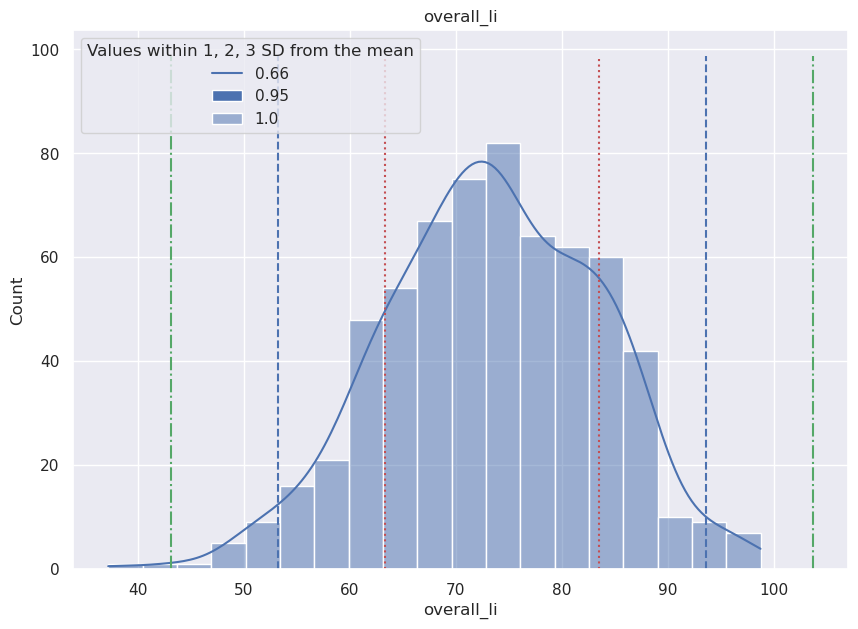

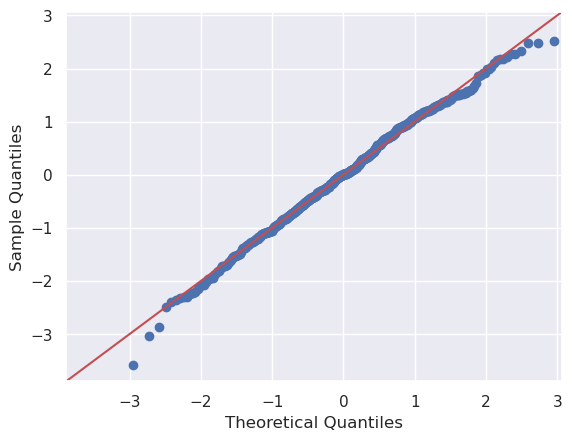

In [24]:
eda.distribution(df, 'overall_li')

In [ ]:
print(df['z_score'].mean())
## Does the mean of the Z score should be close to zero to be normal?
## test with something not normal.
plt.figure(figsize=(15,7))
plt.plot(df['z_score'])